In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### je m'occupe de la france

In [2]:
X_train = pd.read_csv("./X_train_NHkHMNU.csv")
X_test = pd.read_csv("./X_test_final.csv")
y_train = pd.read_csv("./y_train_ZAN5mwg.csv")

In [3]:
X = X_train.copy()
y = y_train.copy()

In [4]:
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

def spearmanScore(y, y_pred):
    return spearmanr(y, y_pred).correlation

score_metric = make_scorer(spearmanScore)  

In [5]:
def correlation_with(X, y: pd.Series):
    if isinstance(X, pd.DataFrame):
        return X.corrwith(y, method='spearman').abs().sort_values(ascending=False)
    return X.corr(y, method='spearman')

In [6]:
X

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,0.359723,-0.294001,-0.470809,1.708814,0.207266,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,0.561356,0.230746,-0.341147,2.957114,0.217922,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,1.072553,-0.180117,0.037892,0.277630,-1.833866,-0.964588,-0.626731,0.196789,-0.981718,0.303324,0.211422,1.493870,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,-0.003973,0.869742,-0.436935,-0.772801,-0.288150,1.447245,0.107706,-0.196405,0.619473,0.918251,0.378080,-0.973969,-0.828580,-0.137667,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [21]:
# préparation de la donnée

X_france = X.loc[(X['COUNTRY'] == 'FR')]
y_france = y.loc[X['COUNTRY'] == 'FR', 'TARGET']

# delete les valeurs abérantes

# X_france = X_france.loc[abs(y_france) < 3]
# y_france = y_france.loc[abs(y_france) < 3]

X_france = X_france.select_dtypes(include=['float64'])
# X_france = X_france.fillna(0)




### on s'occupe des NaN (pre-processing)

In [22]:
# je reentraine une ransom forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [26]:
corre = correlation_with(X_france, y_france)
corre_list = corre.index.to_list()
corre.shape

(32,)

In [13]:
from sklearn.base import TransformerMixin

class CorrelationSelectionTransformer(TransformerMixin):

    def __init__(self, n_components: int = 10):
        self.n_components = n_components

    def set_params(self, **params):
        self.n_components = params.get("n_components", 10)

    def fit(self, X, y):
        best_correlations = correlation_with(X=X, y=y)
        self.correlated_columns = best_correlations.index[:self.n_components]
        return self

    def transform(self, X):
        return X[self.correlated_columns]  

In [14]:
class GaussianDetectionTransformer:

    def __init__(self, std_number: int = 3):
        self.std_number = std_number
    
    def fit(self, X, y):
        self.gaussian_index = (
            (y > (y.mean() - self.std_number*y.std())) &
            (y < (y.mean() + self.std_number*y.std()))
        )
        return self

    def transform(self, X, y):
        return X.loc[self.gaussian_index].copy(), y[self.gaussian_index]

In [35]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import PowerTransformer
from typing import Literal

class VariablesTransformationsTransformer(TransformerMixin):

    def __init__(self,  columns: list[str] | Literal["all"] = []):
        if(isinstance(columns, list)):
            self.columns_to_transform = columns
            self.type = "list"
        else:
            self.type = "all"

    def fit(self, X, y):
        return self
    
    def set_params(self, **params):
        cols = params.get('columns')
        if(isinstance(cols, list)):
            self.columns_to_transform = cols
            self.type = "list"
        else:
            self.type = "all"        
    
    def transform(self, X):
        transformer = PowerTransformer(method="yeo-johnson", standardize=False)
        transformer.set_output(transform="pandas")
        if(self.type == "list" and len(self.columns_to_transform) > 0):
            transformed =  transformer.fit_transform(X[self.columns_to_transform])
            X = X.drop(self.columns_to_transform, axis=1)
            return pd.concat([X, transformed], axis=1)
        if(self.type == "list" and len(self.columns_to_transform) == 0):
            return X
        return transformer.fit_transform(X)

['CARBON_RET',
 'GAS_RET',
 'FR_WINDPOW',
 'DE_HYDRO',
 'DE_NET_EXPORT',
 'DE_NET_IMPORT',
 'DE_WINDPOW',
 'FR_HYDRO',
 'FR_COAL',
 'COAL_RET',
 'DE_RAIN',
 'DE_RESIDUAL_LOAD',
 'DE_CONSUMPTION',
 'FR_TEMP',
 'FR_WIND',
 'DE_SOLAR',
 'DE_WIND',
 'FR_GAS',
 'FR_RAIN',
 'FR_CONSUMPTION',
 'DE_COAL',
 'DE_TEMP',
 'DE_GAS',
 'FR_DE_EXCHANGE',
 'DE_FR_EXCHANGE',
 'DE_NUCLEAR',
 'FR_NET_IMPORT',
 'FR_NET_EXPORT',
 'FR_SOLAR',
 'FR_RESIDUAL_LOAD',
 'FR_NUCLEAR',
 'DE_LIGNITE']

In [ ]:
pipeline = Pipeline([
    ('inpute', KNNImputer().set_output(transform='pandas')),
    ('transform', VariablesTransformationsTransformer()),
    ('scale', StandardScaler().set_output(transform='pandas')),
    ('correlation', CorrelationSelectionTransformer()),
    ('rd_forest', RandomForestRegressor())
])


In [50]:
# j'essaye de me taper ma pipeline seul tt du début jusqu'a la fin 

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
    ('inpute', KNNImputer().set_output(transform='pandas')),
    ('transform', VariablesTransformationsTransformer()),
    ('scale', StandardScaler().set_output(transform='pandas')),
    ('correlation', CorrelationSelectionTransformer()),
    ('rd_forest', RandomForestRegressor())
])

X_france, y_france = GaussianDetectionTransformer(3).fit(X_france, y_france).transform(X_france, y_france)

param_grid = {
    'transform__columns': [[], 'all', corre_list[:10], corre_list[:15], corre_list[:20], corre_list[:25]],
    'correlation__n_components': [5, 7, 10, 15, 20, 25, 32],
    'rd_forest__max_depth': [None, 5, 10, 15], 
    'rd_forest__n_estimators': [3, 5, 8, 15, 10], 
    'rd_forest__max_features': [2, 3, 4],
    'rd_forest__min_samples_split': [2, 3, 4, 7],
    'rd_forest__min_samples_leaf': [2,3,4,5,6,7,8]
}

grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5,
                            scoring=score_metric,
                            return_train_score=True, n_iter=70)

grid_search.fit(X_france, y_france)


In [45]:
df = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
df['percent_std_score'] = (df['std_test_score']*100/df['mean_test_score']).round(3)
df

# pd.DataFrame(grid_search.cv_results_).loc[13, 'params']
pd.DataFrame(grid_search.cv_results_).loc[7, 'params']

{'transform__columns': ['CARBON_RET',
  'GAS_RET',
  'FR_WINDPOW',
  'DE_HYDRO',
  'DE_NET_EXPORT',
  'DE_NET_IMPORT',
  'DE_WINDPOW',
  'FR_HYDRO',
  'FR_COAL',
  'COAL_RET',
  'DE_RAIN',
  'DE_RESIDUAL_LOAD',
  'DE_CONSUMPTION',
  'FR_TEMP',
  'FR_WIND',
  'DE_SOLAR',
  'DE_WIND',
  'FR_GAS',
  'FR_RAIN',
  'FR_CONSUMPTION'],
 'rd_forest__n_estimators': 30,
 'rd_forest__min_samples_split': 20,
 'rd_forest__min_samples_leaf': 100,
 'rd_forest__max_features': 1,
 'rd_forest__max_depth': 8,
 'correlation__n_components': 5}

In [34]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rd_forest__n_estimators,param_rd_forest__min_samples_split,param_rd_forest__min_samples_leaf,param_rd_forest__max_features,param_rd_forest__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.173857,0.074509,0.037269,0.012079,10,40,100,3,6,"{'rd_forest__n_estimators': 10, 'rd_forest__mi...",0.181842,0.116983,0.130744,0.066999,-0.000859,0.099142,0.061951,1,0.234011,0.257655,0.232689,0.237222,0.227336,0.237783,0.010436
4,0.126497,0.010524,0.024993,0.001269,10,40,50,3,3,"{'rd_forest__n_estimators': 10, 'rd_forest__mi...",0.198642,0.043286,0.026300,0.092714,0.130730,0.098334,0.062229,2,0.201111,0.324670,0.291690,0.258229,0.237002,0.262540,0.042788
3,0.297978,0.094279,0.045576,0.025542,30,20,20,4,4,"{'rd_forest__n_estimators': 30, 'rd_forest__mi...",0.235069,0.017217,0.076315,0.100858,0.000607,0.086013,0.083138,3,0.366217,0.384138,0.341524,0.385929,0.366474,0.368856,0.016029
0,0.359491,0.084775,0.043355,0.035047,50,30,20,2,4,"{'rd_forest__n_estimators': 50, 'rd_forest__mi...",0.214424,0.057592,0.061122,0.083091,0.000778,0.083402,0.070931,4,0.346389,0.383909,0.366393,0.362141,0.344844,0.360735,0.014348
2,0.372122,0.065315,0.045385,0.010032,50,20,50,1,6,"{'rd_forest__n_estimators': 50, 'rd_forest__mi...",0.157871,0.059466,0.036279,0.118459,-0.030441,0.068327,0.065410,5,0.295202,0.343526,0.317559,0.282113,0.272732,0.302226,0.025552


In [ ]:
df = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
df['percent_std_score'] = (df['std_test_score']*100/df['mean_test_score']).round(3)
df

,mean_test_score,std_test_score,rank_test_score,percent_std_score
1499,0.225880,0.032084,1,14.204
1292,0.221233,0.082518,2,37.299
638,0.212995,0.053159,3,24.958
1088,0.209261,0.048695,4,23.270
1239,0.206685,0.051540,5,24.936
...,...,...,...,...
139,NaN,NaN,1676,NaN
309,NaN,NaN,1677,NaN
308,NaN,NaN,1678,NaN
316,NaN,NaN,1679,NaN


In [152]:
pipeline = Pipeline([
    ('inpute', KNNImputer()),
    ('scale', StandardScaler()),
    ('rd_forest', RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=10))
])

for i in range(5,15):
    X_france = X_france[correlation_with(X_france, y_france).index[:i]]
    print(i, cross_val_score(pipeline, X_france, y_france, cv=5, scoring=score_metric).mean())

5 0.171256013109994
6 0.14003381206819948
7 0.07294926031794005
8 0.09754334726212152
9 0.10460668054715756
10 0.15213786798381718
11 0.1291899461788327
12 0.16138924154315087
13 0.12457357984034925
14 0.14788960593691694


In [ ]:
from sklearn.impute import KNNImputer

KNN_Imputer_model = KNNImputer(n_neighbors=5)
X_france = KNN_Imputer_model.fit_transform(X_france)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test = S




In [12]:
from sklearn.base import TransformerMixin, BaseEstimator

class Scaler(TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y):
        self.means = X.mean()
        self.std = X.std()
        return self

    def transform(self, X):
        return (X - self.means) / self.std


    


In [18]:
model_scaler = Scaler()
test = model_scaler.fit_transform(X.select_dtypes(include='float64'), y)
test.std()


DE_CONSUMPTION      1.0
FR_CONSUMPTION      1.0
DE_FR_EXCHANGE      1.0
FR_DE_EXCHANGE      1.0
DE_NET_EXPORT       1.0
FR_NET_EXPORT       1.0
DE_NET_IMPORT       1.0
FR_NET_IMPORT       1.0
DE_GAS              1.0
FR_GAS              1.0
DE_COAL             1.0
FR_COAL             1.0
DE_HYDRO            1.0
FR_HYDRO            1.0
DE_NUCLEAR          1.0
FR_NUCLEAR          1.0
DE_SOLAR            1.0
FR_SOLAR            1.0
DE_WINDPOW          1.0
FR_WINDPOW          1.0
DE_LIGNITE          1.0
DE_RESIDUAL_LOAD    1.0
FR_RESIDUAL_LOAD    1.0
DE_RAIN             1.0
FR_RAIN             1.0
DE_WIND             1.0
FR_WIND             1.0
DE_TEMP             1.0
FR_TEMP             1.0
GAS_RET             1.0
COAL_RET            1.0
CARBON_RET          1.0
dtype: float64

In [126]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('impute', KNNImputer()),
    ('scale', StandardScaler()),
    ('rd_forest', RandomForestRegressor())
])

pipeline.fit(X_france, y_france)
cross_val_score(pipeline, X_france, y_france, scoring=score_metric, cv=15)


array([ 0.08523464,  0.05250194,  0.11459684,  0.07590096, -0.04537205,
        0.27618616, -0.02618616,  0.26529686,  0.1987944 , -0.04187192,
        0.23010111,  0.13055366,  0.14162679,  0.11285031,  0.0530417 ])

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {'rd_forest__bootstrap': [False], 'rd_forest__n_estimators': [3, 10], 'rd_forest__max_features': [2, 3, 4]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                            scoring=score_metric,
                            return_train_score=True)
grid_search.fit(X_france, y_france)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('impute', KNNImputer()),
                                       ('scale', StandardScaler()),
                                       ('rd_forest', RandomForestRegressor())]),
             param_grid={'rd_forest__bootstrap': [False],
                         'rd_forest__max_features': [2, 3, 4],
                         'rd_forest__n_estimators': [3, 10]},
             return_train_score=True, scoring=make_scorer(spearmanScore))

In [124]:
pd.DataFrame.from_dict(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rd_forest__bootstrap,param_rd_forest__max_features,param_rd_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007946,0.000945,0.001289,0.000292,False,2,3,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.092193,0.096508,0.064432,0.068882,0.027842,0.069971,0.024514,1,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
1,0.019737,0.000631,0.001396,0.000142,False,2,10,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.009146,-0.046547,-0.020138,0.042001,0.006577,-0.001792,0.029823,6,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
2,0.008348,0.000347,0.000978,0.000125,False,3,3,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.113303,0.036156,0.109935,-0.114788,0.144903,0.057902,0.093424,2,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
3,0.026569,0.001264,0.001399,0.000054,False,3,10,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.117287,0.068530,0.052177,-0.085470,0.118383,0.054182,0.074588,3,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
4,0.010663,0.000596,0.000936,0.000088,False,4,3,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.062282,-0.007639,0.010790,-0.071378,0.098242,0.018459,0.058475,5,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
5,0.035950,0.002427,0.001581,0.000106,False,4,10,"{'rd_forest__bootstrap': False, 'rd_forest__ma...",0.141818,-0.009408,0.016147,0.051877,0.063855,0.052858,0.051498,4,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17


In [102]:
pipeline.fit_transform(X_france)

ValueError: This RandomForestRegressor estimator requires y to be passed, but the target y is None.

In [98]:
inputer = KNNImputer(n_neighbors=5)
X_france = pd.DataFrame(inputer.fit_transform(X_france), columns=inputer.feature_names_in_)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [52]:
correlation_with(X_france, y_france).index[:10]

Index(['CARBON_RET', 'GAS_RET', 'FR_WINDPOW', 'DE_HYDRO', 'DE_NET_EXPORT',
       'DE_NET_IMPORT', 'DE_WINDPOW', 'FR_HYDRO', 'FR_COAL', 'COAL_RET'],
      dtype='object')

### essai random forest

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_france = X_france.select_dtypes(include=['float64'])
ridge_model = Ridge()
scores = cross_val_score(ridge_model, X_france, y_france, scoring=score_metric, cv=15)
scores


array([ 0.17059891,  0.01458387,  0.15128338,  0.207091  , -0.08251232,
        0.16962665, -0.15627431,  0.39175525,  0.35591133, -0.09320716,
        0.25298159,  0.12371839,  0.00833903,  0.19849624,  0.25509228])

In [ ]:
# on trouve le bon set de paramètres


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score



In [100]:
# j'essaye de le faire sans cross_val

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_france = X_france.select_dtypes(include=['float64'])
X_train, X_test, y_train, y_test = train_test_split(X_france, y_france, test_size=0.2, random_state=42)
rd_forest_model = RandomForestRegressor()

rd_forest_model.fit(X_train, y_train)
y_predict = rd_forest_model.predict(X_test)
spearmanScore(y_test, y_predict)


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge_model = Ridge()
X_france = X_france.select_dtypes(include=['float64'])
# ridge_model.fit(X_france, y_france)
scores = cross_val_score(ridge_model, X_france, y_france, scoring=score_metric, cv=20)
scores

array([ 0.07958321,  0.26457264,  0.10480217,  0.2127756 ,  0.19858049,
        0.05753549, -0.06886137, -0.05436424, -0.12292359,  0.1499547 ,
        0.30459076,  0.30995503, -0.18061745,  0.06117819,  0.05599222,
        0.07981525, -0.06231262,  0.24074224,  0.1564703 ,  0.30459444])

In [45]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(X_france.iloc[:, 1:8], figsize=(8,12))
# plt.show()

In [9]:
fr_filter = np.argwhere(X['COUNTRY'] == 'FR').flatten()
de_filter = np.argwhere(X['COUNTRY'] == 'DE').flatten()

ValueError: Length of values (1) does not match length of index (1494)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('impute', KNNImputer()),
    ('scale', StandardScaler())
    (),
]).set_output(transform='pandas')

AttributeError: 'Pipeline' object has no attribute 'set_output'

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class RollingTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, window: int = 3, center: bool = False):
        self.window = window
        self.center = center

    def fit(self, X, y = None):
        return self
    
    def transform(self, X: pd.DataFrame , y=None):
        return X.rolling(window=self.window, center=self.center, min_periods=1).mean(numeric_only=True).fillna(X)


In [ ]:
X_de = X[X['COUNTRY'] == 'DE'].drop(['COUNTRY', 'ID', 'DAY_ID'], axis=1)
y_de = y.loc[X['COUNTRY'] == 'DE', 'TARGET'].copy()

In [ ]:
days = X.loc[X['COUNTRY'] == 'DE', 'DAY_ID']

In [ ]:
data = pipeline.fit_transform(X_de)
target = y_de

In [ ]:
correlation_with(data, target)

DE_RESIDUAL_LOAD    0.324335
DE_NET_EXPORT       0.306204
DE_NET_IMPORT       0.306204
DE_WINDPOW          0.300933
DE_GAS              0.253410
DE_HYDRO            0.217900
FR_WINDPOW          0.199820
DE_WIND             0.173242
DE_COAL             0.142054
DE_LIGNITE          0.124605
FR_WIND             0.119865
FR_RAIN             0.097050
DE_FR_EXCHANGE      0.094402
FR_DE_EXCHANGE      0.094402
FR_GAS              0.072784
DE_CONSUMPTION      0.071736
FR_TEMP             0.061925
FR_HYDRO            0.058362
FR_SOLAR            0.046483
FR_RESIDUAL_LOAD    0.039952
DE_TEMP             0.035537
FR_CONSUMPTION      0.033651
FR_COAL             0.032621
DE_SOLAR            0.021202
COAL_RET            0.020653
DE_RAIN             0.016627
GAS_RET             0.015835
DE_NUCLEAR          0.012366
CARBON_RET          0.010366
FR_NUCLEAR          0.008885
FR_NET_IMPORT       0.004076
FR_NET_EXPORT       0.004076
dtype: float64

In [ ]:
data[['DE_NET_IMPORT', 'DE_NET_EXPORT']]=

,DE_NET_IMPORT,DE_NET_EXPORT
1468,0.809374,-0.809374
680,1.671308,-1.671308
991,0.946904,-0.946904
1356,0.374711,-0.374711
713,-0.619321,0.619321
...,...,...
168,1.386164,-1.386164
1136,-1.136315,1.136315
577,0.269495,-0.269495
986,-0.204204,0.204204


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz


# regressor = RandomForestRegressor(max_depth=1, max_samples=500, n_estimators=1000,bootstrap=True, oob_score=True)

# regressor = BaggingRegressor(DecisionTreeRegressor(max_features=1), n_estimators=1000, max_samples=500, bootstrap_features=True)
regressor = DecisionTreeRegressor()
regressor.fit(data, target)
# print(regressor.feature_importances_)
score_metric(regressor, data, target)

1.0

In [ ]:
export_graphviz(regressor, out_file="tree.dot", feature_names=data.columns, rounded=True, filled=True)

0.9643227490068247


18    0.038045
4     0.037734
6     0.037122
21    0.037075
25    0.036637
20    0.034897
8     0.034829
2     0.033906
9     0.032728
3     0.032486
0     0.031809
26    0.031471
19    0.031294
12    0.031131
31    0.030885
22    0.030811
29    0.030564
23    0.030555
1     0.030533
16    0.030416
10    0.029890
5     0.029620
14    0.029101
30    0.028962
17    0.027772
7     0.027747
11    0.027416
28    0.027395
24    0.027329
27    0.027129
13    0.026508
15    0.026203
dtype: float64

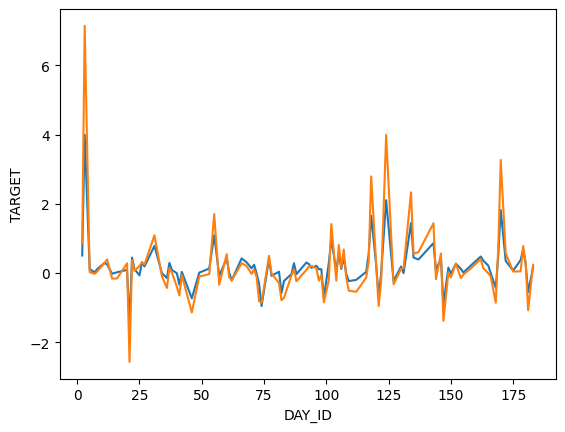

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# model = Ridge(alpha=100)
# model.fit(data, target)
# # model.score(data, target)
# model.oob_score_

# .predict(data)

# print(score_metric(model, data, target))
# print(correlation_with(pd.Series(model), target))
regressor = RandomForestRegressor(max_features=1, max_samples=500, n_estimators=1000,bootstrap=True).fit(data, target)
print(score_metric(regressor, data, target))
sns.lineplot(x=days[:100], y=regressor.predict(data)[:100])
sns.lineplot(x=days[:100], y=target[:100])
pd.Series(regressor.feature_importances_).sort_values(ascending=False)